<a href="https://colab.research.google.com/github/angui100/Coursera__Capstone/blob/master/Battale_Neighbourhoods_ML_Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-1 and Week-2 Tasks

## 1. Introduction of the Business Problem 

The goal of this study is to help a small investor team planning to open a **Youth and Child Learning Center**  in City of Toronto, Ontario, Canada. Being that Toronto is the most populated city in Canada, and continually ranks as an important global city based on a high quality of education, the choice to expand business into the neighbor was an easy selection for the investor team. However, with limited information of the Toronto market, this team needs us to assist in the selection of which area of Toronto will facilitate their **Learning Centers**.

They are interested in openning a learning center in an area that meet the following criteria:

- A neighborhood with an average to above average population of children or youth
- Average to above average median after tax household incomes
- A neighborhood with an average to above population of people who has college degree


With these criteria given by the investor team, based on previous success in other markets, the objective is to locate and recommend to the investors, the target audience, which neighborhood(s) of Toronto will be the best choice to operate their **Youth and Child Learning Center**. The information gained will assist in choosing the right location by providing data about the population of each neighborhood, in addition to other established venues present in these areas.


## 2. Data — The essential information needed for achieve our goal

- City of Toronto Neighborhood Profiles for providing an overview of the neighborhoods in Toronto(
  <a ref="https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/neighbourhood-profiles/">https://www.toronto.ca/city-government/data-research-maps/neighbourhoods-communities/neighbourhood-profiles/</a> ).
  
- City of Toronto Open Data Catalogue : The Census of Population is held across Canada every five years (the last being in 2016), and collects data about age and sex, families and households, language, immigration and internal migration, ethnocultural diversity, Aboriginal peoples, housing, education, income, and labor. City of Toronto Neighborhood Profiles use this Census data to provide a portrait of the demographic, social and economic characteristics of the people and households in each City of Toronto neighborhood. The profiles present selected highlights from the data, but these accompanying data files provide the full data set assembled for each neighborhood(
<a ref="https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a">https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/#8c732154-5012-9afe-d0cd-ba3ffc813d5a</a> 
).

- Here is the Data File in CSV format (<a ref="https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv">https://www.toronto.ca/ext/open_data/catalog/data_set_files/2016_neighbourhood_profiles.csv</a>). Each data point in this file is presented for the City’s 140 neighborhoods, as well as for the City of Toronto as a whole. The data is sourced from several Census tables released by Statistics Canada. The general Census Profile is the main source table for this data, but other Census tables have also been used to provide additional information.

- Here is the Wikipedia for Toronto Neighborhood Borough Designation (<a ref="https://en.wikipedia.org/wiki/List_of_city-designated_neighbourhoods_in_Toronto">https://en.wikipedia.org/wiki/List_of_city-designated_neighbourhoods_in_Toronto</a>). Each of the 140 social planning neighborhoods of Toronto reside within a defined borough. While the City of Toronto is a singular municipality, the 140 neighborhoods are still grouped into six distinct boroughs.

- Foursquare API (<a ref="https://developer.foursquare.com/">https://developer.foursquare.com/</a>) to collect information on other venues/competitors in the neighborhoods of Toronto.

# Discussion - Week 1
## 3. Methodology — In order to establish the targeted neighborhood(s), we will explore the demographics of the neighborhoods in the city of Toronto by segmenting the data and conducting descriptive analysis using Panda. 
Data Group 1
Stage A — Census Data
1. Data was pulled into from the City of Toronto Neighborhoods Profile Census CSV File to create a dataframe.
2. This dataframe contains all the census data (2016) of the neighborhoods of Toronto that will be filtered.
3. Data is filtered into columns based on neighborhood population, Children and Youth age groups, education level, and after-tax income.

Stage B — Neighbourhood Geogrophic information data
1. Geographic data file has Neighbourhood code, Neightbourhood name, Geo Latitude, Logitude
3. Merge this Neighbourhood GEO dataframe with Census Data dataframe.

Data Group 2
Stage A — Establish Medians and scoring system
1. Calculate medians of the demographic columns across the 140 neighborhoods.
Median Children Population: 2844
Median Youth Population: 2431
Median College Education: 3819
Median After Tax Household Income: $35127.6


2. From the criteria delivered by the investor team, each category was given a standardized score based the category being divided by its median score and then multiplied by a factor of given importance. The columns are the summed to create a complex score for each neighborhood. The dataframe is then merged to create a dataframe with all necessary data.


3. From here, utilizing a choropleth folium map, a clearer picture of the neighborhoods of Toronto becomes apparent.

Data Group 3
Stage A — Toronto geographical data is utilized as the input into the Foursquare API, that returned venues from all of Toronto
1. Using the geographical coordinates of each neighborhood in Toronto, calls are made to the Foursquare API to return the top 100 venues in a radius of 1000 meters. 
2. The data is then visualized via a folium map.

3. Foursquare is called on again to narrow the list to the neighborhoods within the top fifteen (15) total score (with the same parameters as the previous call), and this data is mapped as well.

Data Group 4
Stage A — Analyze the Top 15 neighborhoods of Toronto
1. Utilize one hot encoding to transform our list of established venues in the top 15 neighborhoods to return all Venue category information

2. Group by neighborhoods. Filter out venues related to retail and personal care categories to focus on learning activity centered venues (i.e. school, music center, bookstore, etc…). Create a small dataframe to display totals for each neighborhood.


### Import all required Python packages for data processing work

In [0]:
#import all required packages
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


#### A simple numeric data format setting



In [31]:
import locale
from locale import atof

locale.setlocale(locale.LC_NUMERIC, '')
#df.applymap(atof)

'en_US.UTF-8'

# City of Toronto 2016 Census data analsys

### 1. Load the Census information into Pandas DataFrame

In [32]:
#Read Census Data File
df_census = pd.read_csv(r'2016_neighbourhood_profiles.csv', encoding = "ISO-8859-1", thousands=',')

df_census.shape

(2383, 145)

In [33]:
df_census.head()

,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
1,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,No Designation,NIA,No Designation,No Designation,No Designation,NIA,NIA,Emerging Neighbourhood,No Designation,No Designation,NIA,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,Emerging Neighbourhood,NIA,NIA,No Designation,NIA,No Designation,No Designation,NIA,NIA,No Designat

### 2. After review the raw Census data. We decided to take following items.
- Neighbourhood code
- Children Population
- Youth Population
- Household Income After Tax
- Population holding Bachelor's degree

In [34]:
df_family_info = df_census.loc[df_census.index[[0, 9, 10, 1026, 1709]]]
#df_family_info.applymap(atof)
df_family_info.head()

,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
9,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),"398,135","3,840","3,075","1,760","2,360","3,605","2,325","1,695","2,415","1,515","4,555","1,120","4,550","3,345","4,600","1,405","1,855","1,435","1,470","3,360",800,"1,490","1,200","2,150","1,260","4,565","2,765","2,575","1,910","1,675","3,020","4,065","4,250","4,480","5,725","1,285","3,735","2,120","4,180","1,805","4,805","2,635","1,695","4,385","2,060","1,365","5,790","2,460","1,295","2,505","2,850","3,540","1,545","2,115","1,450","2,155","2,945","2,165","2,310","5,820","2,190","1,610","2,775","1,315","4,240","1,580","1,695","6,120","2,420","3,280","2,845","3,285","1,400","1,335","7,910","1,500","1,340","3,675","3,505","2,880","1,540","2,395","7,090","2,980","2,380","1,610","1,585","2,810","2,055","1,960","2,290","2,865","3,130","3,110","1,470","1,280","5,840","1,745","1,150","2,050","1,770","1,635","1,640","3,505","2,300","2,6

### 3. Remove certain columns which are not used in our data analysis

In [35]:
#df_census.columns.values
df_family_info.drop(columns=['Category', 'Topic', 'Data Source', 'Characteristic', 'City of Toronto'], axis=1, inplace=True)
df_family_info.applymap(atof)
df_family_info.head()


,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,129,128,20,95,42,34,76,52,49,39,112,127,122,24,69,108,41,57,30,71,109,96,133,75,120,33,123,92,66,59,47,126,93,26,83,62,9,138,5,32,11,13,44,102,101,25,65,140,53,88,87,134,48,8,21,22,106,125,14,90,110,124,78,6,15,114,117,38,105,103,56,84,19,132,29,12,130,17,135,73,115,2,99,104,18,50,36,82,68,74,121,107,54,58,80,45,23,67,46,10,72,4,111,86,98,131,89,28,139,85,70,40,116,16,118,61,63,3,55,81,79,43,77,136,1,35,113,91,119,51,37,7,137,64,60,94,100,97,27,31
9,"3,840","3,075","1,760","2,360","3,605","2,325","1,695","2,415","1,515","4,555","1,120","4,550","3,345","4,600","1,405","1,855","1,435","1,470","3,360",800,"1,490","1,200","2,150","1,260","4,565","2,765","2,575","1,910","1,675","3,020","4,065","4,250","4,480","5,725","1,285","3,735","2,120","4,180","1,805","4,805","2,635","1,695","4,385","2,060","1,365","5,790","2,460","1,295","2,505","2,850","3,540","1,545","2,115","1,450","2,155","2,945","2,165","2,310","5,820","2,190","1,610","2,775","1,315","4,240","1,580","1,695","6,120","2,420","3,280","2,845","3,285","1,400","1,335","7,910","1,500","1,340","3,675","3,505","2,880","1,540","2,395","7,090","2,980","2,380","1,610","1,585","2,810","2,055","1,960","2,290","2,865","3,130","3,110","1,470","1,280","5,840","1,745","1,150","2,050","1,770","1,635","1,640","3,505","2,300","2,625","7,960","2,050","1,940","3,365","2,115","3,975","2,645","3,150","4,060","3,885","2,950","3,825","1,730","5,600","1,745",565,"2,630","3,650","4,635","5,060","3,440","3,100","1,675","4,215","5,920","1,785","3,555","9,625","2,325","1,165","1,86

**Week 2 work continued here for Census Dataset**<br>
### 4. Transpose the original Pandas DataFrame for data analyzing items with 140 neighbourhoods.

In [36]:
# Transpose the dataframe
df_family_info_t = df_family_info.T
#df_family_info_t.head()
df_family_info_t.shape


(140, 5)

In [37]:
#df_family_info_t.columns=df_family_info_t.iloc[0]
df_family_info_t.reset_index(inplace = True)
df_family_info_t.columns=["Neighbourhood", "Neighbourhood_Code", "Children", "Youth", "Avg_Household_Income", "College_Educated"]
df_family_info_t.head()

,Neighbourhood,Neighbourhood_Code,Children,Youth,Avg_Household_Income,College_Educated
0,Agincourt North,129,"3,840","3,705","427,037",4380
1,Agincourt South-Malvern West,128,"3,075","3,360","278,390",4210
2,Alderwood,20,"1,760","1,235","168,602",1660
3,Annex,95,"2,360","3,750","792,507",9135
4,Banbury-Don Mills,42,"3,605","2,730","493,486",6500


### 5. Convert all string type numeric fields into integer type for math operations

In [38]:
df_family_info_t["Children"] = df_family_info_t["Children"].str.replace(",","").astype(int)
df_family_info_t["Youth"] = df_family_info_t["Youth"].str.replace(",","").astype(int)
df_family_info_t["Avg_Household_Income"] = df_family_info_t["Avg_Household_Income"].str.replace(",","").astype(int)
df_family_info_t["College_Educated"] = df_family_info_t["College_Educated"].str.replace(",","").astype(int)

df_family_info_t = df_family_info_t.astype({'Neighbourhood_Code':int})
df_family_info_t.sort_values(['Neighbourhood_Code'], ascending=True).head()

,Neighbourhood,Neighbourhood_Code,Children,Youth,Avg_Household_Income,College_Educated
124,West Humber-Clairville,1,5060,5445,426156,4245
81,Mount Olive-Silverstone-Jamestown,2,7090,5240,360648,3015
117,Thistletown-Beaumond Heights,3,1730,1410,140050,1175
101,Rexdale-Kipling,4,1640,1355,134305,1185
38,Elms-Old Rexdale,5,1805,1440,123119,820


### 6. Let us review statistic information for this DataFrame

In [39]:
df_family_info_t.describe()

,Neighbourhood_Code,Children,Youth,Avg_Household_Income,College_Educated
count,140.0000,140.000000,140.000000,1.400000e+02,140.000000
mean,70.5000,2843.964286,2430.928571,3.512761e+05,3819.000000
std,40.5586,1546.225445,1457.994778,2.309379e+05,3046.742287
min,1.0000,565.000000,675.000000,1.022590e+05,445.000000
25%,35.7500,1695.000000,1428.750000,1.953375e+05,2053.750000
50%,70.5000,2405.000000,2100.000000,2.915495e+05,3257.500000
75%,105.2500,3567.500000,3022.500000,4.305408e+05,4385.000000
max,140.0000,9625.000000,7840.000000,1.413132e+06,27280.000000


### 7. Normalize data with statistic information


In [40]:
#Scale columns Population of Children, Youth, Household_Income after tax, and finished College Education population
#The weights scale will be used for K clustering

df_family_info_t["Children_Weight"] = df_family_info_t["Children"].divide(df_family_info_t["Children"].mean())
df_family_info_t["Youth_Weight"] = df_family_info_t["Youth"].divide(df_family_info_t["Youth"].mean)
df_family_info_t["Household_Income_Weight"] = df_family_info_t["Avg_Household_Income"].divide(df_family_info_t["Avg_Household_Income"].mean())
df_family_info_t["College_Educated_Weight"] = df_family_info_t["College_Educated"].divide(df_family_info_t["College_Educated"].mean())
df_family_info_t.head()

,Neighbourhood,Neighbourhood_Code,Children,Youth,Avg_Household_Income,College_Educated,Children_Weight,Youth_Weight,Household_Income_Weight,College_Educated_Weight
0,Agincourt North,129,3840,3705,427037,4380,1.350211,1.524064,1.215673,1.146897
1,Agincourt South-Malvern West,128,3075,3360,278390,4210,1.081224,1.382147,0.792511,1.102383
2,Alderwood,20,1760,1235,168602,1660,0.618847,0.508021,0.479970,0.434669
3,Annex,95,2360,3750,792507,9135,0.829817,1.542575,2.256080,2.391987
4,Banbury-Don Mills,42,3605,2730,493486,6500,1.267581,1.122995,1.404838,1.702016


**Here is the normalized dataset.**



In [41]:
df_weights_info = df_family_info_t[['Neighbourhood', 'Neighbourhood_Code', 'Children_Weight', 'Youth_Weight', 'Household_Income_Weight', 'College_Educated_Weight']]
df_weights_info.head()

,Neighbourhood,Neighbourhood_Code,Children_Weight,Youth_Weight,Household_Income_Weight,College_Educated_Weight
0,Agincourt North,129,1.350211,1.524064,1.215673,1.146897
1,Agincourt South-Malvern West,128,1.081224,1.382147,0.792511,1.102383
2,Alderwood,20,0.618847,0.508021,0.479970,0.434669
3,Annex,95,0.829817,1.542575,2.256080,2.391987
4,Banbury-Don Mills,42,1.267581,1.122995,1.404838,1.702016


### 8. Dataset visualization part

**1. The Bar chart for 140 neighbourhoods**

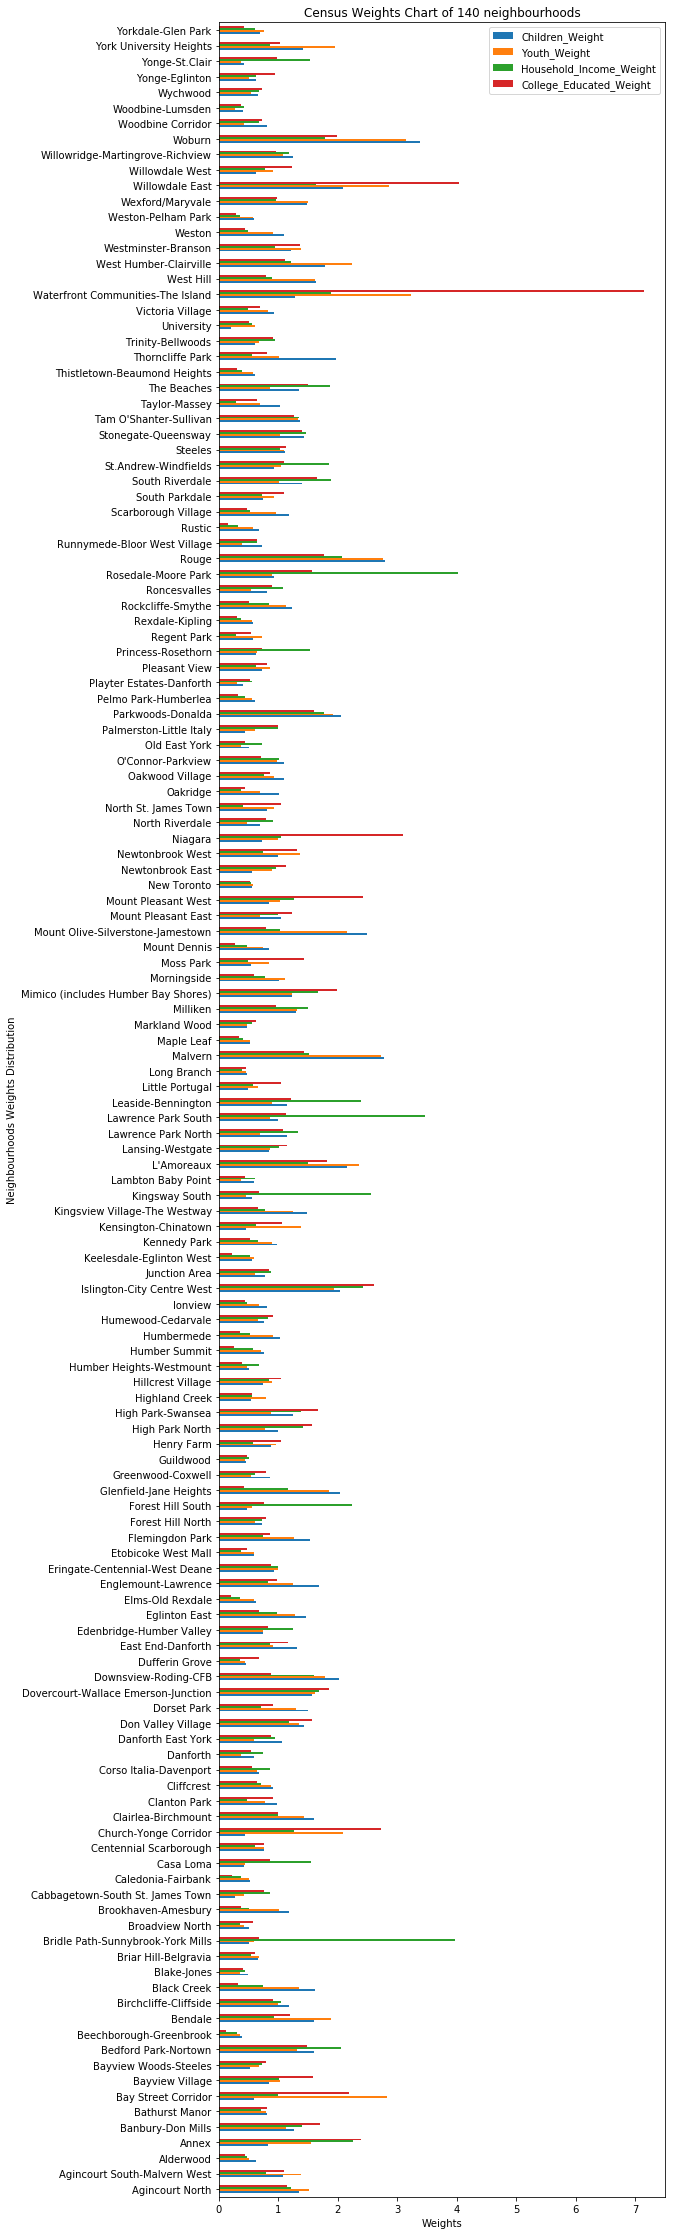

In [81]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

df_weights_bar_char = df_family_info_t[['Neighbourhood', 'Children_Weight', 'Youth_Weight', 'Household_Income_Weight', 'College_Educated_Weight']]
#df_weights_bar_char.head()

ax = df_weights_bar_char.plot(kind='barh', figsize=(8, 40))
ax.set_yticklabels(df_weights_bar_char['Neighbourhood'])

#df_pc.set_index(['Interested fields'], inplace = True)
plt.title('Census Weights Chart of 140 neighbourhoods')

plt.ylabel('Neighbourhoods Weights Distribution')
plt.xlabel('Weights')
plt.show()

**2. Observing the corelations amoung Children, Household_Income, College_Educated weights thru the Scatter Plots**

- <font color="red"><b>Red colo</b>r</font> represents Household after tax income is above the average, they may have extra money in their bank account. These families may likely to be the **Learning Center** customers.

- <font color="blue"><b>Blue color</b></font> represents Household after tax income is two times over the average, they do have extra money in their bank account. These families are most likely to be the majority of  **Learning Center** customers.

- <font color="green"><b>Green color</b></font> represnets Houshold after tax income is barely reached the average or less, they may be interested in some discounts programs or lower cost programes in the **Learning Center**. 


In [0]:
#Let us create a Scatter Chart with these facts
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

'''
# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure(figsize=(20, 8))

ax = fig.add_subplot(111, projection='3d')

# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l > 1 and l < 2:
          cols.append('red')           
        elif l >= 2:
          cols.append('blue')          
        elif l == 1:
          cols.append('black')
        else:
            cols.append('green')            
    return cols
# Create the colors list using the function above
cols=pltcolor(df_weights_bar_char["Household_Income_Weight"])

xs = df_weights_bar_char["Household_Income_Weight"] 
ys = df_weights_bar_char["College_Educated_Weight"] 
zs = df_weights_bar_char["Children_Weight"] 

ax.scatter(xs, ys, zs, c=cols, s=50)

ax.set_xlabel('Houshold_Income')
ax.set_ylabel('College_Educated')
ax.set_zlabel('Children')

plt.title("3D Visualization")
plt.show()
'''

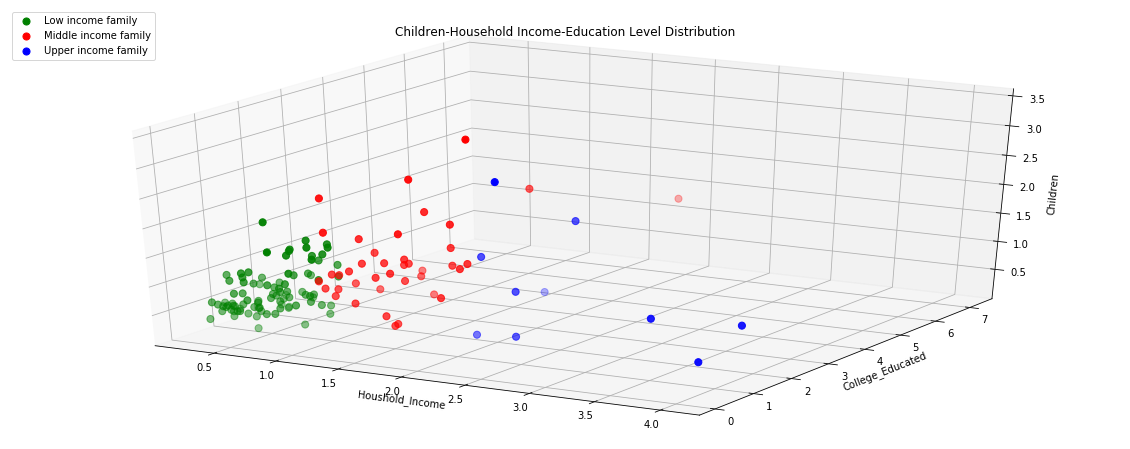

In [44]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure(figsize=(20, 8))

#ax = fig.add_subplot(111, projection='3d')

n = len(df_weights_bar_char["Household_Income_Weight"])
X = df_weights_bar_char["Household_Income_Weight"]
Y = df_weights_bar_char["College_Educated_Weight"]
Z = df_weights_bar_char["Children_Weight"]
x1 = []
x2 = []
x3 = []
y1 = []
y2 = []
y3 = []
z1 = []
z2 = []
z3 = []

# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    i=0
    for l in lst:
        if l > 1 and l < 2:
          cols.append('red') 
          x1.append(X[i])
          y1.append(Y[i])
          z1.append(Z[i])
        elif l >= 2:
          cols.append('blue')
          x2.append(X[i])
          y2.append(Y[i])
          z2.append(Z[i])
        else:
            cols.append('green')
            x3.append(X[i])
            y3.append(Y[i])
            z3.append(Z[i])
        i = i+1
    return cols
# Create the colors list using the function above
cols=pltcolor(df_weights_bar_char["Household_Income_Weight"])


mpl.rcParams['legend.fontsize'] = 10

ax_c = fig.gca(projection='3d')

ax_c.scatter(x3, y3, z3, label='Low income family', s=50, marker='o', c='green')
ax_c.scatter(x1, y1, z1, label='Middle income family', s=50, marker='o', c='red')
ax_c.scatter(x2, y2, z2, label='Upper income family', s=50, marker='o', c='blue')

ax_c.legend(loc="upper left")

ax_c.set_xlabel('Houshold_Income')
ax_c.set_ylabel('College_Educated')
ax_c.set_zlabel('Children')

plt.title("Children-Household Income-Education Level Distribution")

plt.show()



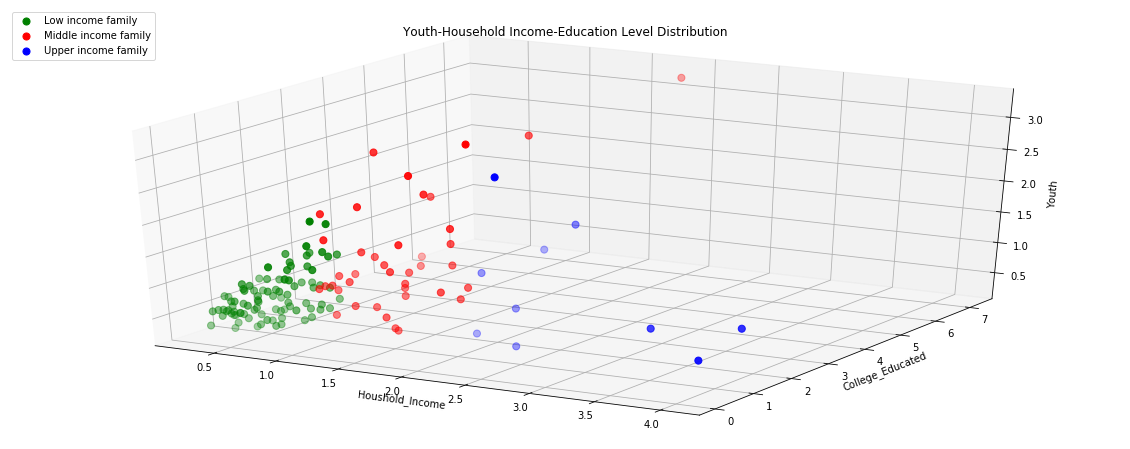

In [45]:
fig = plt.figure(figsize=(20, 8))

n = len(df_weights_bar_char["Household_Income_Weight"])
X = df_weights_bar_char["Household_Income_Weight"]
Y = df_weights_bar_char["College_Educated_Weight"]
Z = df_weights_bar_char["Youth_Weight"]
x1 = []
x2 = []
x3 = []
y1 = []
y2 = []
y3 = []
z1 = []
z2 = []
z3 = []

# Function to map the colors as a list from the input list of x variables
def pltcolor(lst):
    cols=[]
    i=0
    for l in lst:
        if l >= 1 and l < 2:
          cols.append('red') 
          x1.append(X[i])
          y1.append(Y[i])
          z1.append(Z[i])
        elif l >= 2:
          cols.append('blue')
          x2.append(X[i])
          y2.append(Y[i])
          z2.append(Z[i])
        else:
            cols.append('green')
            x3.append(X[i])
            y3.append(Y[i])
            z3.append(Z[i])
        i = i+1
    return cols
# Create the colors list using the function above
cols=pltcolor(df_weights_bar_char["Household_Income_Weight"])


mpl.rcParams['legend.fontsize'] = 10

ax_y = fig.gca(projection='3d')

ax_y.scatter(x3, y3, z3, label='Low income family', s=50, marker='o', c='green')
ax_y.scatter(x1, y1, z1, label='Middle income family', s=50, marker='o', c='red')
ax_y.scatter(x2, y2, z2, label='Upper income family', s=50, marker='o', c='blue')

ax_y.legend(loc="upper left")

ax_y.set_xlabel('Houshold_Income')
ax_y.set_ylabel('College_Educated')
ax_y.set_zlabel('Youth')

plt.title("Youth-Household Income-Education Level Distribution")

plt.show()


**Conclusions of observations from these above 3-D Plot Charts**

The Children distribution and Youth distribution are following similar distribution pattern with College Education, Household Income distribution. It gives us kind of idea, both of Children, Youth distributions follow same mathmetic model for data processing.

**3. Let us visualizing data trends thru following Scatter Plot charts**<br>
**(1) the Children-Education trend**<br>
**(2) the Youth-Education trend**<br>
**(3) the Education-Household Income trend**<br>
**(4) the Children-Household Income trend**<br>
**(5) the Youth-Household Income trend**<br>

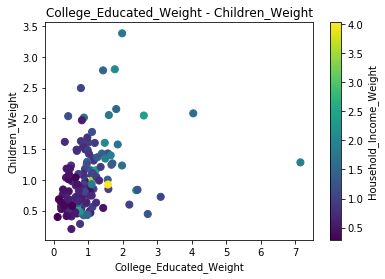

In [66]:
df_ch_ed = df_weights_bar_char[['College_Educated_Weight', 'Children_Weight','Household_Income_Weight']]

ax2 = df_ch_ed.plot.scatter(x='College_Educated_Weight',
                            y='Children_Weight',
                            c='Household_Income_Weight',
                            s=50,
                            colormap='viridis',
                            sharex=False)
#
plt.title('College_Educated_Weight - Children_Weight')
plt.show()

In [63]:
ax2.get_xlabel()

'College_Educated_Weight'

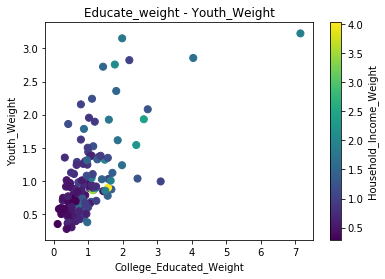

In [67]:
df_yt_ed = df_weights_bar_char[['Youth_Weight', 'College_Educated_Weight', 'Household_Income_Weight']]
ax3 = df_yt_ed.plot.scatter(x='College_Educated_Weight',
                            y='Youth_Weight',
                            c='Household_Income_Weight',
                            colormap='viridis',
                            s=50,
                            sharex=False)
plt.title("Educate_weight - Youth_Weight")
plt.show()

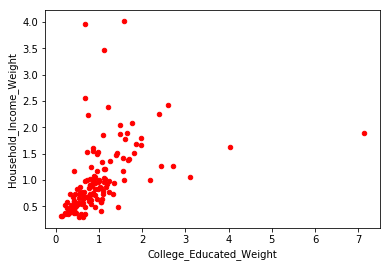

In [0]:
df_ed_in = df_weights_bar_char[['College_Educated_Weight', 'Household_Income_Weight']]
ax4 = df_ed_in.plot.scatter(x="College_Educated_Weight",
                            y="Household_Income_Weight",
                            c="red")

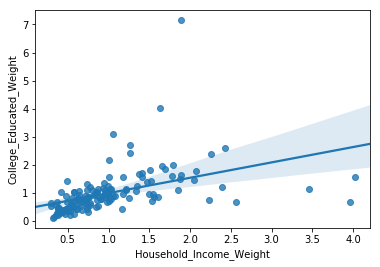

In [0]:
import seaborn as sns
ax4_ = sns.regplot(x='Household_Income_Weight', y='College_Educated_Weight', data=df_ed_in)

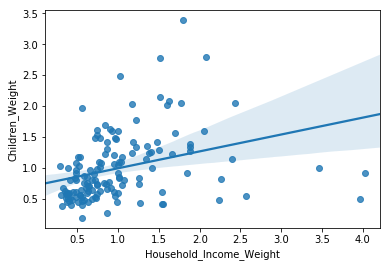

In [0]:
df_ch_in = df_weights_bar_char[['Household_Income_Weight', 'Children_Weight']]
ax5_ = sns.regplot(x='Household_Income_Weight', y='Children_Weight', data=df_ch_in)

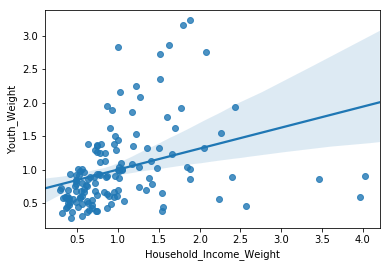

In [0]:
df_yt_in = df_weights_bar_char[['Household_Income_Weight', 'Youth_Weight']]
ax6_ = sns.regplot(x='Household_Income_Weight', y='Youth_Weight', data=df_yt_in)

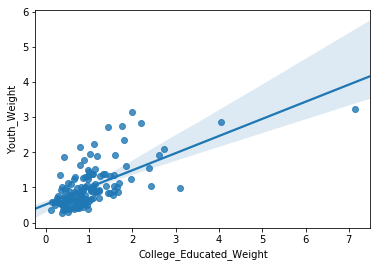

In [0]:
df_yt_ed = df_weights_bar_char[['College_Educated_Weight', 'Youth_Weight']]
ax7_ = sns.regplot(x='College_Educated_Weight', y='Youth_Weight', data=df_yt_ed)

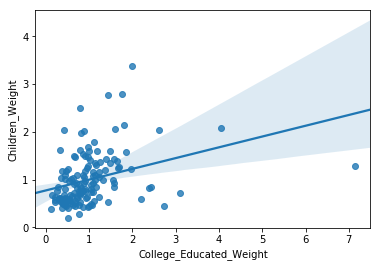

In [0]:
df_ch_ed = df_weights_bar_char[['College_Educated_Weight', 'Children_Weight']]
ax8_ = sns.regplot(x='College_Educated_Weight', y='Children_Weight', data=df_ch_ed)

**Conclusion of the Plots observations**

From the above charts, there is positive corelation between Education level and Household income, also the Children, Youth follow the same positive corelation pattern. This discovery gives us the idead to develop the correct mathmetic model to work on this problem.


### 9. Applying K-Means Clustering Classification method for all 140 neighbourhoods

**(1) The input dataset is Children_Weight, Youth_Weight, Household_Income_Weights, College_Educated_Weight**


In [0]:
from sklearn.preprocessing import StandardScaler

#To have the better effectives of the clustering classification, the data is transformed with StandardScaler call.

df_weights_clustering = df_weights_bar_char.drop(columns=['Neighbourhood'], axis=1)
df_weights_clustering_X = StandardScaler().fit_transform(df_weights_clustering)
df_weights_clustering_X


In [71]:
#let us run K clustering
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=4).fit(df_weights_clustering_X)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 4, 0, 4, 4, 0, 4, 4, 0, 4], dtype=int32)

**(2) Merge the Clustering Labels with the DataFrame, which is the input dataset.**

In [0]:
df_weights_info.insert(0, 'Cluster Labels', kmeans.labels_)

In [82]:
df_weights_info.head()

,Cluster Labels,Neighbourhood,Neighbourhood_Code,Children_Weight,Youth_Weight,Household_Income_Weight,College_Educated_Weight
0,4,Agincourt North,129,1.350211,1.524064,1.215673,1.146897
1,4,Agincourt South-Malvern West,128,1.081224,1.382147,0.792511,1.102383
2,0,Alderwood,20,0.618847,0.508021,0.479970,0.434669
3,4,Annex,95,0.829817,1.542575,2.256080,2.391987
4,4,Banbury-Don Mills,42,1.267581,1.122995,1.404838,1.702016


###10. Hypothesis (Build the mathmetical model)

Based in the above data visualization plots, we assumed an existing linear relation as,<br> **Complex_Score = 20% X Children_Weight + 20% X Youth_Weight + 20% X College_Educated_Weight + 40% X Houshold_Income_Weight**

**Simply Represents mathmetical formula,**<br><br>
**f(x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>) = &#952;<sub>1</sub>x<sub>1</sub> + &#952;<sub>2</sub>x<sub>2</sub> + &#952;<sub>3</sub>x<sub>3</sub>**

In [84]:
#Create a complex weights equation
#complex_weight_score = Children_Weight X 20% + Youth_Weight X 20% + Avg_Household_Income_Weight X 40% + College_Educated_Weight X 20%
df_weights_info["Complex_Score"]=df_weights_info["Children_Weight"]*0.2 + df_weights_info["Youth_Weight"]*0.2 + df_weights_info["Household_Income_Weight"]*0.4 + df_weights_info["College_Educated_Weight"]*0.2 

df_weights_info.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Cluster Labels,Neighbourhood,Neighbourhood_Code,Children_Weight,Youth_Weight,Household_Income_Weight,College_Educated_Weight,Complex_Score
0,4,Agincourt North,129,1.350211,1.524064,1.215673,1.146897,1.290504
1,4,Agincourt South-Malvern West,128,1.081224,1.382147,0.792511,1.102383,1.030155
2,0,Alderwood,20,0.618847,0.508021,0.479970,0.434669,0.504295
3,4,Annex,95,0.829817,1.542575,2.256080,2.391987,1.855308
4,4,Banbury-Don Mills,42,1.267581,1.122995,1.404838,1.702016,1.380454


###11. Observing the dataset with Classification and the Complex Score - The labels corelation with the calculated Complex Score

There is an existing correlation between the Complex Score value and the Clustering Labels. Except one neighbour hood - Waterfront Communities-The Island may has confilcation with our hypothesis. After certain researchs of the residents information in this area, it becaomes to be understandable. This is the area for people who may just graduated from college to stay for aboudance job opportunities. That tells us why the College_Educated_Weight is very high, but the Household_Income_Weight is not as high as other neighbour hoods.

In [85]:
#df_top_16 = df_weights_info.sort_values(by=['Complex_Score', 'Cluster Labels'], ascending=False).head(16)
df_top_16 = df_weights_info.sort_values(by=['Complex_Score'], ascending=False).head(16)

df_top_16

,Cluster Labels,Neighbourhood,Neighbourhood_Code,Children_Weight,Youth_Weight,Household_Income_Weight,College_Educated_Weight,Complex_Score
122,2,Waterfront Communities-The Island,77,1.283404,3.225010,1.885505,7.143231,3.084531
129,2,Willowdale East,51,2.081575,2.854792,1.628790,4.041634,2.447116
132,1,Woburn,137,3.384318,3.150967,1.790700,1.983504,2.420037
105,1,Rouge,131,2.798875,2.756067,2.075729,1.771406,2.295561
58,1,Islington-City Centre West,14,2.046414,1.931304,2.432910,2.610631,2.290834
104,3,Rosedale-Moore Park,98,0.922996,0.898807,4.022853,1.573710,2.288244
73,1,Malvern,132,2.781294,2.723159,1.517900,1.431003,1.994251
69,3,Lawrence Park South,103,1.000352,0.861785,3.463330,1.129877,1.983735
16,3,Bridle Path-Sunnybrook-York Mills,41,0.504571,0.586179,3.962723,0.676879,1.938615
66,1,L'Amoreaux,117,2.151899,2.357055,1.507028,1.811993,1.867001


Since neighbourhood **Waterfron Communities-The Island** is a special out of range spot compare to other spots. so, we move it out from our exploring vision.

In [86]:
df_top_16.drop(index=122, axis=0, inplace=True)
df_top_16

,Cluster Labels,Neighbourhood,Neighbourhood_Code,Children_Weight,Youth_Weight,Household_Income_Weight,College_Educated_Weight,Complex_Score
129,2,Willowdale East,51,2.081575,2.854792,1.628790,4.041634,2.447116
132,1,Woburn,137,3.384318,3.150967,1.790700,1.983504,2.420037
105,1,Rouge,131,2.798875,2.756067,2.075729,1.771406,2.295561
58,1,Islington-City Centre West,14,2.046414,1.931304,2.432910,2.610631,2.290834
104,3,Rosedale-Moore Park,98,0.922996,0.898807,4.022853,1.573710,2.288244
73,1,Malvern,132,2.781294,2.723159,1.517900,1.431003,1.994251
69,3,Lawrence Park South,103,1.000352,0.861785,3.463330,1.129877,1.983735
16,3,Bridle Path-Sunnybrook-York Mills,41,0.504571,0.586179,3.962723,0.676879,1.938615
66,1,L'Amoreaux,117,2.151899,2.357055,1.507028,1.811993,1.867001
3,4,Annex,95,0.829817,1.542575,2.256080,2.391987,1.855308


In [0]:
df_top_16.set_index("Neighbourhood_Code", inplace=True)

**Week 2 - End of Census Dataset Analyzing**


###12. Prepare the GEO data of the 140 neighbourhoods.

In [88]:
#Let us join the GEO table with these Census info table
df_geo_toronto = pd.read_csv(r'Neighbourhoods.csv', encoding = "ISO-8859-1", thousands=',')

df_geo_toronto.head()


,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,2241,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,2242,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,2243,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,2244,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,2245,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


In [89]:
df_geo_neighbourhoods = df_geo_toronto[["AREA_SHORT_CODE","AREA_NAME", "LATITUDE", "LONGITUDE"]]

df_geo_neighbourhoods.set_index("AREA_SHORT_CODE")
df_geo_neighbourhoods.sort_values(["AREA_SHORT_CODE"], ascending=True).head()

,AREA_SHORT_CODE,AREA_NAME,LATITUDE,LONGITUDE
63,1,West Humber-Clairville (1),43.716180,-79.596356
20,2,Mount Olive-Silverstone-Jamestown (2),43.746868,-79.587259
56,3,Thistletown-Beaumond Heights (3),43.737988,-79.563491
40,4,Rexdale-Kipling (4),43.723725,-79.566228
112,5,Elms-Old Rexdale (5),43.721519,-79.548983


**Work of Week 2 start here**

- Make dataset visualization thru **Folium map**

- Analyzing Venues of Neighbourhoods thru **FourSquare API** 

- Make **Conculusions** after the data analyzing process had been done

###13. Observing data thru maps

**(1) First let us merge the Census dataset with the Neighbourhood GEO dataset**

In [90]:
df_census_neighbourhood_join = df_weights_info.set_index('Neighbourhood_Code').join(df_geo_neighbourhoods.set_index("AREA_SHORT_CODE"))
df_census_neighbourhood_join.shape

(140, 10)

In [91]:
df_census_neighbourhood_join.drop(columns=['AREA_NAME'], inplace=True)
df_census_neighbourhood_join.head()

,Cluster Labels,Neighbourhood,Children_Weight,Youth_Weight,Household_Income_Weight,College_Educated_Weight,Complex_Score,LATITUDE,LONGITUDE
Neighbourhood_Code,,,,,,,,,
129,4,Agincourt North,1.350211,1.524064,1.215673,1.146897,1.290504,43.805441,-79.266712
128,4,Agincourt South-Malvern West,1.081224,1.382147,0.792511,1.102383,1.030155,43.788658,-79.265612
20,0,Alderwood,0.618847,0.508021,0.479970,0.434669,0.504295,43.604937,-79.541611
95,4,Annex,0.829817,1.542575,2.256080,2.391987,1.855308,43.671585,-79.404001
42,4,Banbury-Don Mills,1.267581,1.122995,1.404838,1.702016,1.380454,43.737657,-79.349718


**(2) Observing the Classified 140 neighbourhoods in the map**

In [92]:
#Create Clustering map
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_census_neighbourhood_join['LATITUDE'], df_census_neighbourhood_join['LONGITUDE'], df_census_neighbourhood_join['Neighbourhood'], df_census_neighbourhood_join['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<img src="map1.png" alt="K-Means_Clustering_Classified_Neighbourhoods" title="Classified Neighbourhoods" />

**(3) Let us observing the top 15 business oportunity neighbourhoods thru map**

**Merge the top business opportunity dataframe with the neighbourhood GEO dataframe**<br>
**Observing these classified neighbourhoods thru the map**


**Let us create a Barchar to observe the top 15 neighbourhoods more closely.**



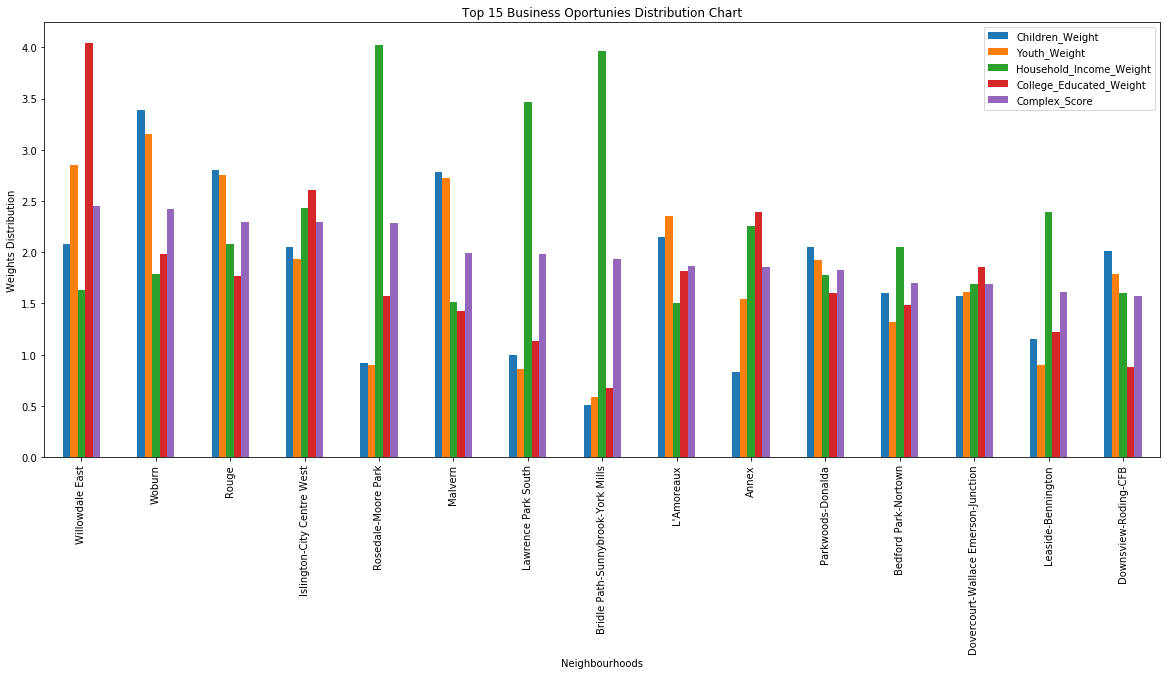

In [93]:
df_top15_oportunities = df_top_16[["Neighbourhood", "Children_Weight", "Youth_Weight", "Household_Income_Weight", "College_Educated_Weight", "Complex_Score"]]
df_top15_oportunities.set_index("Neighbourhood", inplace=True)
df_top15_oportunities.plot(kind='bar', figsize=(20, 8))

plt.title('Top 15 Business Oportunies Distribution Chart')

plt.xlabel('Neighbourhoods')
plt.ylabel('Weights Distribution')
plt.show()

**(4) Visualization data distribution thru map**

In [94]:
df_top15_oportunities_geo = df_top_16.join(df_geo_neighbourhoods.set_index("AREA_SHORT_CODE"))
df_top15_oportunities_geo.drop(columns=["AREA_NAME"], inplace=True)
df_top15_oportunities_geo.head()

,Cluster Labels,Neighbourhood,Children_Weight,Youth_Weight,Household_Income_Weight,College_Educated_Weight,Complex_Score,LATITUDE,LONGITUDE
Neighbourhood_Code,,,,,,,,,
51,2,Willowdale East,2.081575,2.854792,1.628790,4.041634,2.447116,43.770602,-79.401484
137,1,Woburn,3.384318,3.150967,1.790700,1.983504,2.420037,43.766740,-79.228586
131,1,Rouge,2.798875,2.756067,2.075729,1.771406,2.295561,43.821201,-79.186343
14,1,Islington-City Centre West,2.046414,1.931304,2.432910,2.610631,2.290834,43.633463,-79.543317
98,3,Rosedale-Moore Park,0.922996,0.898807,4.022853,1.573710,2.288244,43.682820,-79.379669


**Here is the 15 most important locations ofr us in the map visualization**


In [95]:
# create map for top 15 business opportunities neighbourhoods
map_clusters_top15 = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_top15_oportunities_geo['LATITUDE'], df_top15_oportunities_geo['LONGITUDE'], df_top15_oportunities_geo['Neighbourhood'], df_top15_oportunities_geo['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_top15)
       
map_clusters_top15

<img src="map2.png" alt="top_15_business_locations" title="Neighbourhoods_for_Business" />



###14. Utilizing the Foursquare API to explore the neighborhoods and segment them
Define Foursquare Credentials and Version
Now, let's get the top 100 venues that are in top 15 neighbourhoods within a radius of 1000 meters.

First, let's create the GET request URL.

Send Request thru the API call.

Observing the result of the responsed JSON data.

In [0]:
# @hidden_cell
CLIENT_ID = 'URQCL0KJ4KGOL31CQW105ID4PCBVI0DCNXA3P12YF1GAVMKV' # your Foursquare ID
CLIENT_SECRET = 'JI4SDXR4RFB1JTHILGKJV2B1NXAIXXCPVWB22NRVU3NRXBMH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 200
RADIUS = 2000


In [0]:
def getNearbyVenues(names, latitudes, longitudes, labels, radius):
    
    venues_list=[]
    for name, lat, lng, lb in zip(names, latitudes, longitudes, labels):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lb,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Cluster Labels',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [98]:
top15_neighbourhoods_venues = getNearbyVenues(names=df_top15_oportunities_geo['Neighbourhood'],
                                              latitudes=df_top15_oportunities_geo['LATITUDE'],
                                              longitudes=df_top15_oportunities_geo['LONGITUDE'],
                                              labels=df_top15_oportunities_geo['Cluster Labels'],
                                              radius=RADIUS
                                             )

top15_neighbourhoods_venues.head()

,Neighborhood,Cluster Labels,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Willowdale East,2,Maryam Hotel,43.766961,-79.401199,Hotel
1,Willowdale East,2,The Keg,43.766579,-79.412131,Steakhouse
2,Willowdale East,2,Konjiki Ramen,43.766998,-79.412222,Ramen Restaurant
3,Willowdale East,2,The Captain's Boil,43.773255,-79.413805,Seafood Restaurant
4,Willowdale East,2,Kinka Izakaya,43.760161,-79.409827,Japanese Restaurant


**Sort the neighbourhoods' Venues number from higher to lower.**<br>
This information tells what are the most popular neighbourhoos for people running business. It is a very important factor for us to choose the best venue location.

In [99]:
top15_neighbourhoods_venues.groupby('Neighborhood').count().sort_values(by='Venue', ascending=False)

,Cluster Labels,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,
Annex,100,100,100,100,100
Bedford Park-Nortown,100,100,100,100,100
Dovercourt-Wallace Emerson-Junction,100,100,100,100,100
Lawrence Park South,100,100,100,100,100
Leaside-Bennington,100,100,100,100,100
Parkwoods-Donalda,100,100,100,100,100
Rosedale-Moore Park,100,100,100,100,100
Woburn,78,78,78,78,78
L'Amoreaux,63,63,63,63,63


###15. Observing Education activity related venues in this to 15 neighbourhoods.

It gives us the firm idea which neighbour hood is a good place to operate the Education Activity related venues.

**Look into the venues category**<br>

Research on existing similar venues like **Learning Center**. 

In [100]:
top15_neighbourhoods_venues[top15_neighbourhoods_venues["Venue Category"].str.contains('Museum|School|Music|Bookstore|Learning|Dance|Sports')]

,Neighborhood,Cluster Labels,Venue,Venue Latitude,Venue Longitude,Venue Category
46,Woburn,1,Long & McQuade,43.775903,-79.230965,Music Store
52,Woburn,1,The Comic Room,43.754258,-79.244319,Bookstore
55,Woburn,1,Centennial Recreation Centre,43.774593,-79.236500,Athletics & Sports
194,Rosedale-Moore Park,3,Toronto Lawn Tennis Club,43.680667,-79.388559,Athletics & Sports
242,Rosedale-Moore Park,3,DanceLifeX Centre,43.666956,-79.385297,Dance Studio
244,Rosedale-Moore Park,3,Indigo,43.669065,-79.389057,Bookstore
361,Lawrence Park South,3,Indigo,43.707750,-79.398565,Bookstore
367,Lawrence Park South,3,BMV Books,43.707450,-79.398457,Bookstore
548,L'Amoreaux,1,L'Amoreaux Sports Centre,43.803002,-79.304475,Athletics & Sports
564,L'Amoreaux,1,L'Amoreaux Community Recreation Centre,43.812106,-79.305097,Athletics & Sports


### 16. Results

**The final dataframe contains the most venues blooming neighbourhoods**


In [101]:
df_top15_oportunities_geo[df_top15_oportunities_geo['Neighbourhood'].isin(['Annex', 'Bedford Park-Nortown', 'Dovercourt-Wallace Emerson-Junction', 'Rosedale-Moore Park', 'Lawrence Park South', 'Leaside-Bennington', 'Downsview-Roding-CFB', "L'Amoreaux", 'Woburn'])]

,Cluster Labels,Neighbourhood,Children_Weight,Youth_Weight,Household_Income_Weight,College_Educated_Weight,Complex_Score,LATITUDE,LONGITUDE
Neighbourhood_Code,,,,,,,,,
137,1,Woburn,3.384318,3.150967,1.790700,1.983504,2.420037,43.766740,-79.228586
98,3,Rosedale-Moore Park,0.922996,0.898807,4.022853,1.573710,2.288244,43.682820,-79.379669
103,3,Lawrence Park South,1.000352,0.861785,3.463330,1.129877,1.983735,43.717212,-79.406039
117,1,L'Amoreaux,2.151899,2.357055,1.507028,1.811993,1.867001,43.795716,-79.314084
95,4,Annex,0.829817,1.542575,2.256080,2.391987,1.855308,43.671585,-79.404001
39,4,Bedford Park-Nortown,1.601617,1.320444,2.050248,1.480754,1.700662,43.731486,-79.420227
93,4,Dovercourt-Wallace Emerson-Junction,1.575246,1.614562,1.692335,1.855198,1.685935,43.665677,-79.438541
56,3,Leaside-Bennington,1.155063,0.894694,2.395890,1.221524,1.612612,43.703797,-79.366072
26,1,Downsview-Roding-CFB,2.013010,1.785274,1.602141,0.877193,1.575952,43.733292,-79.490497


###17. Discussion
From the results discovered and presented, the following observations and recommendations can be made: Based on the criteria given by the investor team and the cluster data, the main neighborhood recommendation would be for the neighborhood of **Annex**. With a total score of 1.86 and being in the cluster 4, this area is a prime location for a **Learning Center**. A secondary recommendation is made for the neighborhood of **Lawrence Park South**. This neighborhood a ranking in the top fifteen total score assessment, as well as having less competition. 


###18. Conclusions
From above research of corelated Venues, we do not find any competitors who have same businesses in our search radar. Following are top neighbourhoods which are ideal locations to operate the **Learning Center** venues.

-  Annex
- Bedford Park-Nortown
- Dovercourt-Wallace Emerson-Junction
- Rosedale-Moore Park
- Lawrence Park South
- Leaside-Bennington
- Downsview-Roding-CFB
- L'Amoreaux
- Woburn


## 19. Machine Learning Part - RandomForest Classifier Model

After finished the task to find the best location for operating the **Learning Center** business in City of Toronto. We realized we could build a machine learning model for this investor team for finding other opportunities in the rest of the cities in Canada.

**Here is how we start.**<br>
1. Create the Census DataSet for 140 neighbourhoods with selected data items, such population od Children, Youth, College Graduated people, after tax Household Income.
2. Create the venues DataSet for 140 neighbourhoods, summarize all categories for each neighbourhood
3. Merge these two above datsets
4. Calculate all items weights
5. Add a predictable column with clustering labels 0, 1, 2, 3, 4, 5, 6. The higher the value of the label means better neighbourhood for running **Learning Center** business. 

**1. The extracted Census data**

In [165]:
df_family_info_t.head()

,Neighbourhood,Neighbourhood_Code,Children,Youth,Avg_Household_Income,College_Educated,Children_Weight,Youth_Weight,Household_Income_Weight,College_Educated_Weight
0,Agincourt North,129,3840,3705,427037,4380,1.350211,1.524064,1.215673,1.146897
1,Agincourt South-Malvern West,128,3075,3360,278390,4210,1.081224,1.382147,0.792511,1.102383
2,Alderwood,20,1760,1235,168602,1660,0.618847,0.508021,0.479970,0.434669
3,Annex,95,2360,3750,792507,9135,0.829817,1.542575,2.256080,2.391987
4,Banbury-Don Mills,42,3605,2730,493486,6500,1.267581,1.122995,1.404838,1.702016


**2. Create a subset of the Census data for next step**

In [111]:
df_census_status = df_family_info_t[["Neighbourhood", "Neighbourhood_Code", "Children", "Youth", "Avg_Household_Income", "College_Educated"]]
df_census_status.head()

,Neighbourhood,Neighbourhood_Code,Children,Youth,Avg_Household_Income,College_Educated
0,Agincourt North,129,3840,3705,427037,4380
1,Agincourt South-Malvern West,128,3075,3360,278390,4210
2,Alderwood,20,1760,1235,168602,1660
3,Annex,95,2360,3750,792507,9135
4,Banbury-Don Mills,42,3605,2730,493486,6500


**3. The original GEO information for 140 neighbourhoods**

In [114]:
df_geo_neighbourhoods.head()

,AREA_SHORT_CODE,AREA_NAME,LATITUDE,LONGITUDE
0,94,Wychwood (94),43.676919,-79.425515
1,100,Yonge-Eglinton (100),43.704689,-79.403590
2,97,Yonge-St.Clair (97),43.687859,-79.397871
3,27,York University Heights (27),43.765736,-79.488883
4,31,Yorkdale-Glen Park (31),43.714672,-79.457108


**4. Collect all existing venues for 140 neighbourhoods**<br>

The reason we do this, is because we realize the existing Venues status is a significant factor for business activities, for instance the volume of customer flow, the real estate cost etc.

In [0]:
def getNeighbourhoodVenues(names, latitudes, longitudes, areacode, radius):
    
    venues_list=[]
    for name, lat, lng, neighbourcode in zip(names, latitudes, longitudes, areacode):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            neighbourcode,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 'Neighbourhood_Code',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [117]:
df_neighbourhoods_venues = getNeighbourhoodVenues(names=df_geo_neighbourhoods['AREA_NAME'],
                                              latitudes=df_geo_neighbourhoods['LATITUDE'],
                                              longitudes=df_geo_neighbourhoods['LONGITUDE'],
                                              areacode=df_geo_neighbourhoods['AREA_SHORT_CODE'],
                                              radius=RADIUS
                                             )

df_neighbourhoods_venues.head()

,Neighborhood,Neighbourhood_Code,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wychwood (94),94,Wychwood Barns,43.680028,-79.423810,Event Space
1,Wychwood (94),94,Wychwood Barns Farmers' Market,43.680010,-79.423849,Farmers Market
2,Wychwood (94),94,Pukka Restaurant,43.681055,-79.429187,Indian Restaurant
3,Wychwood (94),94,The Stockyards,43.681570,-79.426210,BBQ Joint
4,Wychwood (94),94,CocoaLatte,43.681768,-79.425158,Café


**5. Summarize all venues group by neighbourhoods**

In [123]:
df_neighbourhood_venues_count = df_neighbourhoods_venues.groupby('Neighbourhood_Code').count().sort_values(by='Venue', ascending=False)
df_neighbourhood_venues_count.head()

,Neighborhood,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood_Code,,,,,
71,100,100,100,100,100
75,100,100,100,100,100
86,100,100,100,100,100
85,100,100,100,100,100
84,100,100,100,100,100


In [124]:
df_neighbourhood_venues_count.drop(columns=['Neighborhood', 'Venue Latitude', 'Venue Longitude', 'Venue Category'], inplace=True)
df_neighbourhood_venues_count.head()

,Venue
Neighbourhood_Code,
71,100
75,100
86,100
85,100
84,100


**6. Merge the Census data with Venues data, indexed with Neighbourhood_Code. Manipulate data to be ready for Classification**

In [128]:
#Prepare for the Venues DataSet
df_census_geo_venue = df_census_status.set_index('Neighbourhood_Code').join(df_neighbourhood_venues_count)
df_census_geo_venue.head()


,Neighbourhood,Children,Youth,Avg_Household_Income,College_Educated,Venue
Neighbourhood_Code,,,,,,
129,Agincourt North,3840,3705,427037,4380,40
128,Agincourt South-Malvern West,3075,3360,278390,4210,100
20,Alderwood,1760,1235,168602,1660,100
95,Annex,2360,3750,792507,9135,100
42,Banbury-Don Mills,3605,2730,493486,6500,100


**Checking the statistic information of the dataset**

In [133]:
df_census_geo_venue.describe()

,Children,Youth,Avg_Household_Income,College_Educated,Venue
count,140.000000,140.000000,1.400000e+02,140.000000,140.000000
mean,2843.964286,2430.928571,3.512761e+05,3819.000000,78.985714
std,1546.225445,1457.994778,2.309379e+05,3046.742287,25.475616
min,565.000000,675.000000,1.022590e+05,445.000000,14.000000
25%,1695.000000,1428.750000,1.953375e+05,2053.750000,54.000000
50%,2405.000000,2100.000000,2.915495e+05,3257.500000,98.500000
75%,3567.500000,3022.500000,4.305408e+05,4385.000000,100.000000
max,9625.000000,7840.000000,1.413132e+06,27280.000000,100.000000


**Rename column Venue to Venue_Count**

In [137]:
df_census_geo_venue.rename(columns={"Venue":"Venue_Count"}, inplace=True)
df_census_geo_venue.head()

,Neighbourhood,Children,Youth,Avg_Household_Income,College_Educated,Venue_Count
Neighbourhood_Code,,,,,,
129,Agincourt North,3840,3705,427037,4380,40
128,Agincourt South-Malvern West,3075,3360,278390,4210,100
20,Alderwood,1760,1235,168602,1660,100
95,Annex,2360,3750,792507,9135,100
42,Banbury-Don Mills,3605,2730,493486,6500,100


**Normalize all data elements**

In [138]:
#df_census_geo_venue.mean(axis=0)

#Scale columns Population of Children, Youth, Household_Income after tax, and finished College Education population
#The weights scale will be used for K clustering

df_census_geo_venue["Children_Weight"] = df_census_geo_venue["Children"].divide(df_census_geo_venue["Children"].mean())
df_census_geo_venue["Youth_Weight"] = df_census_geo_venue["Youth"].divide(df_census_geo_venue["Youth"].mean())
df_census_geo_venue["Household_Income_Weight"] = df_census_geo_venue["Avg_Household_Income"].divide(df_census_geo_venue["Avg_Household_Income"].mean())
df_census_geo_venue["College_Educated_Weight"] = df_census_geo_venue["College_Educated"].divide(df_census_geo_venue["College_Educated"].mean())
df_census_geo_venue["Venue_Weight"] = df_census_geo_venue["Venue_Count"].divide(df_census_geo_venue["Venue_Count"].mean())
df_census_geo_venue.head()

,Neighbourhood,Children,Youth,Avg_Household_Income,College_Educated,Venue_Count,Children_Weight,Youth_Weight,Household_Income_Weight,College_Educated_Weight,Venue_Weight
Neighbourhood_Code,,,,,,,,,,,
129,Agincourt North,3840,3705,427037,4380,40,1.350228,1.524109,1.215673,1.146897,0.506421
128,Agincourt South-Malvern West,3075,3360,278390,4210,100,1.081237,1.382188,0.792510,1.102383,1.266052
20,Alderwood,1760,1235,168602,1660,100,0.618854,0.508036,0.479970,0.434669,1.266052
95,Annex,2360,3750,792507,9135,100,0.829828,1.542620,2.256080,2.391987,1.266052
42,Banbury-Don Mills,3605,2730,493486,6500,100,1.267597,1.123028,1.404838,1.702016,1.266052


**Here is the Normalized dataset**

In [149]:
df_ML_model = df_census_geo_venue[['Children_Weight', 'Youth_Weight', 'Household_Income_Weight', 'College_Educated_Weight', 'Venue_Weight']]
df_ML_model.head()

,Children_Weight,Youth_Weight,Household_Income_Weight,College_Educated_Weight,Venue_Weight
Neighbourhood_Code,,,,,
129,1.350228,1.524109,1.215673,1.146897,0.506421
128,1.081237,1.382188,0.792510,1.102383,1.266052
20,0.618854,0.508036,0.479970,0.434669,1.266052
95,0.829828,1.542620,2.256080,2.391987,1.266052
42,1.267597,1.123028,1.404838,1.702016,1.266052


**7. Applying K-Means clustering classification**

In [0]:
#Apply K-Means Clustering Classification

#To have the better effectives of the clustering classification, the data is transformed with StandardScaler call.

df_ML_model_X = StandardScaler().fit_transform(df_ML_model)
df_ML_model_X


**Running classification**

In [151]:
#let us run K clustering
# set number of clusters
kclusters = 7

# run k-means clustering
kmeans_ML = KMeans(n_clusters=kclusters, random_state=4).fit(df_ML_model_X)

# check cluster labels generated for each row in the dataframe
kmeans_ML.labels_[0:10]

array([1, 6, 0, 6, 6, 3, 6, 6, 3, 6], dtype=int32)

**Review all labels**

In [152]:
kmeans_ML.labels_

array([1, 6, 0, 6, 6, 3, 6, 6, 3, 6, 3, 6, 3, 1, 0, 3, 2, 0, 3, 0, 0, 0,
       3, 6, 6, 3, 3, 0, 0, 0, 6, 6, 6, 1, 0, 6, 3, 1, 3, 6, 3, 3, 1, 0,
       2, 1, 0, 3, 0, 6, 6, 3, 0, 3, 3, 3, 0, 0, 5, 0, 0, 3, 0, 1, 2, 0,
       5, 0, 3, 2, 2, 0, 3, 5, 0, 3, 6, 6, 3, 0, 3, 1, 0, 6, 3, 0, 6, 6,
       0, 0, 0, 0, 3, 0, 0, 6, 3, 0, 0, 3, 0, 3, 0, 0, 2, 5, 0, 3, 3, 0,
       6, 6, 6, 6, 6, 0, 6, 3, 1, 0, 0, 3, 4, 1, 1, 6, 3, 0, 6, 5, 0, 1,
       5, 0, 3, 0, 0, 0, 1, 0], dtype=int32)

**Merge labels with existing dataset**

In [0]:
df_ML_model.insert(0, 'Cluster Labels', kmeans_ML.labels_)
#df_ML_model.sort_values(by="Cluster Labels", ascending=False)

**Review the classified dataset**

In [167]:
df_ML_model.sort_values(by="Cluster Labels", ascending=False).head()

,Cluster Labels,Children_Weight,Youth_Weight,Household_Income_Weight,College_Educated_Weight,Venue_Weight
Neighbourhood_Code,,,,,,
40,6,0.930040,1.044868,1.848378,1.099764,1.164768
116,6,1.107609,1.104516,1.033503,1.131186,1.266052
104,6,0.836860,1.036641,1.261250,2.428646,1.266052
62,6,1.313308,0.909118,0.865445,1.159990,1.266052
63,6,1.344954,0.853583,1.876564,1.493847,1.266052


**8. Building the machine learning model**<br>

1. Spliting the dataset into two parts of train set and test set.<br>
2. Training the RandomForestClassifier model
3. Save the model to file and deliver it to investor team

In [0]:
X = df_ML_model[['Children_Weight',	'Youth_Weight',	'Household_Income_Weight',	'College_Educated_Weight',	'Venue_Weight']].values
y = df_ML_model["Cluster Labels"]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [0]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_trainset, y_trainset)

y_pred=clf.predict(X_testset)

In [161]:
print(y_pred)

[6 6 6 3 3 0 1 3 6 3 6 0 1 6 6 3 3 3 6 6 3 0 5 5 3 0 3 0 0 6 3 3 6 6 3 0 0
 1 6 3 0 0]


**Save the trained model for production purpose (delivery)**

In [0]:
import pickle

filename_model = '/tmp/finalized_model.sav'
pickle.dump(clf, open(filename_model, 'wb'))

**Load this model to run prediction test**

In [0]:
loaded_model = pickle.load(open(filename_model, 'rb'))


**Test with a good location case**<br>
The label is 6, means a highly recommended location for business.

In [173]:
print(loaded_model.predict([[1.0, 1.2, 3, 2, 1.5]]))

[6]


**Try a worst case**<br>
The label is 2, means a location not good for business.

In [174]:
print(clf.predict([[0.1, 0.2, 3, 2, 0.5]]))

[2]
